<a href="https://colab.research.google.com/github/AlexanderSychev2005/stat_un/blob/main/analysys_lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [132]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.optimize import basinhopping


In [133]:
def F(x, y):
    return -(1 + np.cos(12 * np.sqrt(x**2 + y**2))) / (0.5 * (x**2 + y**2) + 2)

In [134]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = F(X, Y)

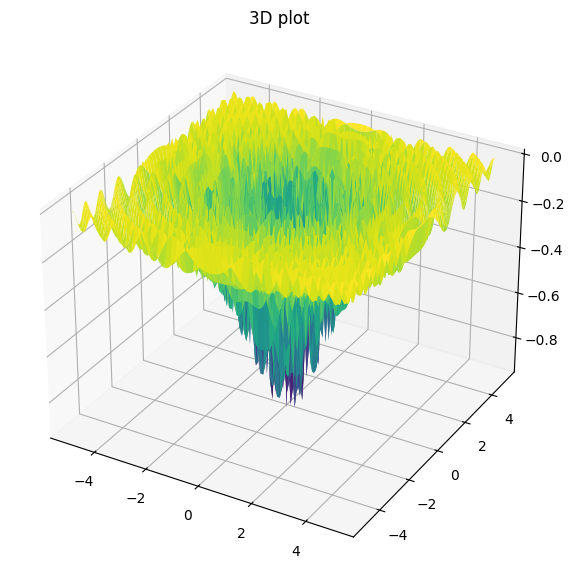

In [135]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
plt.title("3D plot")
plt.show()

## Simple stochastic search

In [136]:
def simple_stochastic(num_iter=10000):
  x_best, y_best = None, None
  best_value = float('inf')

  for i in range(num_iter):
    x = random.uniform(-5, 5) # Random float value
    y = random.uniform(-5, 5)
    F_x_y = F(x, y)

    if F_x_y < best_value:
      x_best, y_best, best_value = x, y, F_x_y

  return x_best, y_best, best_value

x_best, y_best, best_value = simple_stochastic()
print(f"Stochastic search: x = {x_best}, y = {y_best}, F(x, y) = {best_value}")


Stochastic search: x = 0.4525077936132851, y = -0.24875444686680215, F(x, y) = -0.9357448201231094


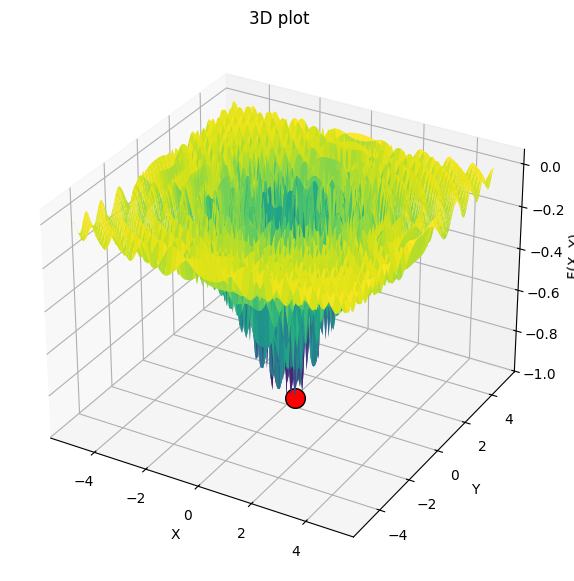

In [142]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.scatter(x_best, y_best, best_value, color='red', s=200, edgecolors='black', depthshade=False, label="Глобальный минимум")
plt.title("3D plot")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("F(X, Y)")

plt.show()

## Simulated Annealing (Метод імітації відпалу)

In [138]:
from scipy.optimize import dual_annealing

def F_2(x):
    x1, x2 = x  # Разбираем массив на два элемента
    return -(1 + np.cos(12 * np.sqrt(x1**2 + x2**2))) / (0.5 * (x1**2 + x2**2) + 2)

lw = [-5] * 2
up = [5] * 2

res = dual_annealing(F_2, bounds=list(zip(lw, up)))
res

 message: ['Maximum number of iteration reached']
 success: True
  status: 0
     fun: -0.9999999999999984
       x: [-4.551e-09 -4.746e-09]
     nit: 1000
    nfev: 4040
    njev: 13
    nhev: 0

In [139]:
print(F(-4.735e-09, -4.624e-09))

-0.9999999999999984


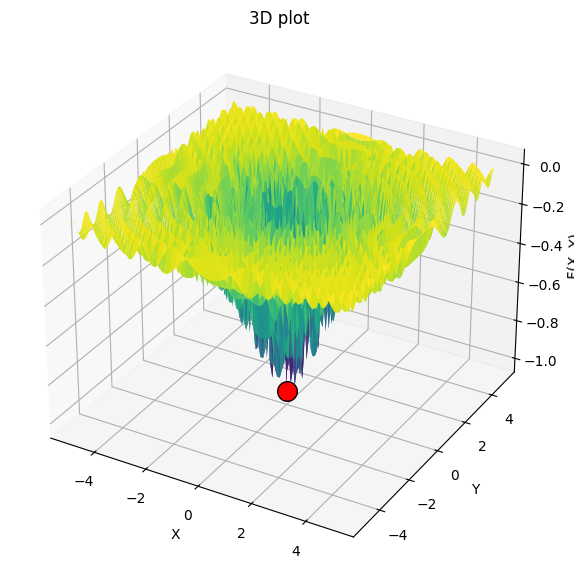

In [140]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.scatter(res.x[0], res.x[1], res.fun, color='red', s=200, edgecolors='black', depthshade=False, label="Глобальный минимум")
plt.title("3D plot")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("F(X, Y)")

plt.show()

In [170]:
def simulated_annealing(x0, y0, t_min, t_max, v, max_iter=20000):
  x, y = x0, y0
  iteration = 0
  while t_max > t_min and iteration < max_iter:
    iteration += 1

    while True:
      z_x, z_y = np.random.normal(0, 1, 2) # two random numbers from a normal distribution with mathematical expectation 0 and standard deviation 1.
      e_x, e_y = np.random.uniform(0, 1, 2) # creates an array of two random numbers uniformly (равномерно )distributed on the interval (0, 1)
      x_new = x + z_x * t_max * ((1+ iteration/max_iter) ** (2 * e_x - 1) - 1)
      y_new = y + z_y * t_max * ((1+ iteration/max_iter) ** (2 * e_y - 1) - 1)

      F_old = F(x, y)
      F_new = F(x_new, y_new)

      dE = F_new - F_old
      if dE < 0 or np.random.rand() < np.exp(-dE / t_max):
          x, y = x_new, y_new

      t_max *= v

      if -5 <= x_new <= 5 and -5 <= y_new <= 5:
        break
  return x, y, F(x, y)

x, y, F_x_y = simulated_annealing(0, 0, 0.001, 50, 0.99)
print(x, y, F_x_y)

-0.640343099294173 -0.01563239436761042 -0.5291232615542669


In [153]:
print(np.random.normal(0, 1, 2))

[-0.93696914  1.26818115]


In [152]:
print(np.random.uniform(0, 1, 2))

[0.23098461 0.72746849]


5
